In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

path = '/home/miguel.filho/Documents/rnd-sac-emails/'

# path = '/content/gdrive/MyDrive/DataScience/Sac Emails/'
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
df = pd.read_parquet(f'{path}/data/poc_sac.parquet')

In [3]:
df.head(3)

,sac_subject,sac_category,sac_customer_voice,sac_reason,created_date,email_subject,message,problem,detail,customer_email
0,Entregas,Reclamação,"Pedido consta como entregue, mas não recebi",Protocolo de entrega,2020-01-16 17:25:42,ENTREGAS,"Boa tarde Kanui ou Dafiti, gostaria de saber q...",Dúvida sobre o andamento do meu pedido,None,dgoguitar@hotmail.com
1,Atendimento,Reclamação,Meu problema não foi resolvido,None,2020-01-02 13:17:59,ENTREGAS,Porque consta que já foi concluída a entrega...,Problemas com a entrega,None,mariaitrassi@gmail.com
2,Trocas,Solicitação,"Estou arrependido, quero cancelar/trocar o pro...",Produto ainda não entregue com NF,2020-01-02 16:37:38,TROCAS E DEVOLUÇÕES,Ola fiz uma compra e n recebir o produto tente...,"Trocar, cancelar ou devolver",Quero cancelar ou devolver minha compra,arildo.samorim@gmail.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649028 entries, 0 to 1649027
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   sac_subject         1649028 non-null  object
 1   sac_category        1649028 non-null  object
 2   sac_customer_voice  1649028 non-null  object
 3   sac_reason          499112 non-null   object
 4   created_date        1649028 non-null  object
 5   email_subject       1649027 non-null  object
 6   message             1648416 non-null  object
 7   problem             1638808 non-null  object
 8   detail              530683 non-null   object
 9   customer_email      1649028 non-null  object
dtypes: object(10)
memory usage: 125.8+ MB


In [5]:
df.created_date = pd.to_datetime(df.created_date)

In [6]:
df.shape

(1649028, 10)

## EDA

### Message

In [7]:
##Remover emails sem mensagem definida
df = df[~df['message'].isnull()]
df = df.reset_index(drop=True)

In [8]:
df['message_size'] = df.message.apply(len)

Text(0.5, 0, 'Número de caracteres')

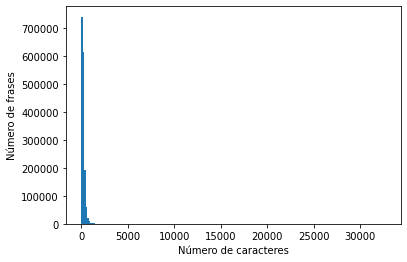

In [9]:
df['message_size'].hist(bins=200)
plt.grid(alpha=0)
plt.ylabel('Número de frases')
plt.xlabel('Número de caracteres')

<AxesSubplot:>

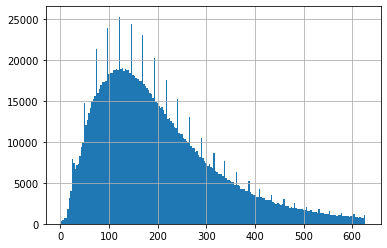

In [10]:
df[df.message_size < 3 * df.message_size.std()]['message_size'].hist(bins=200)

In [11]:
df = df[df.message_size < 3 * df.message_size.std()]

### Customer Voice

In [12]:
df.sac_customer_voice.value_counts().head(30)

Ja realizei a compra e estou com dúvida sobre o andamento do pedido                        338172
Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução            200182
Meu pedido ainda não chegou                                                                195030
Estou arrependido, quero cancelar/trocar o produto                                          70875
Meu problema não foi resolvido                                                              66493
Já devolvi meu produto e quero saber o andamento da troca / devolução                       63992
Como utilizar o cupom/vale                                                                  61600
Quero alterar/incluir meu endereço de entrega                                               56819
Pedido consta como entregue, mas não recebi                                                 46994
Qual o prazo para devolução do valor que paguei?                                            44290
Cliente solicitou a 

In [13]:
group_cv = [
    'Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução',
    'Estou arrependido, quero cancelar/trocar o produto',
    'Ainda não recebi meu produto e quero saber sobre processo de cancelamento'
]
df['customer_voice_grouped'] = df['sac_customer_voice'].apply(lambda x: 'Arrependimento' if x in group_cv else x)


### Problem

In [14]:
print('{:.1%} dos emails criados tem o problema definido'.format(df.count()['problem']/df.shape[0]))

99.4% dos emails criados tem o problema definido


In [15]:
df['problem'].value_counts()[:30]

Problemas com a entrega                                                                   430712
Outros                                                                                    355479
Trocar, cancelar ou devolver                                                              256389
Dúvida sobre o andamento do meu pedido                                                    146999
Andamento da minha troca                                                                  144752
Vales e Reembolso                                                                         111841
Vales e reembolsos                                                                         51378
Pagamento                                                                                  45875
Cadastro                                                                                   30436
Promoções                                                                                  12104
Nota Fiscal                   

In [16]:
problems_list = [
  'Problemas com a entrega',
  'Outros',
  'Trocar, cancelar ou devolver',
  'Andamento da minha troca',
  'Vales e Reembolso',
  'Dúvida sobre o andamento do meu pedido',
  'Vales e reembolsos',
  'Pagamento',
  'Cadastro',
  'Nota Fiscal',
  'Promoções'
]
df['problem'] = df['problem'].apply(lambda x: x if x in problems_list else np.nan)
df['problem'].replace('Vales e reembolsos', 'Vales e Reembolso', inplace=True)

<AxesSubplot:>

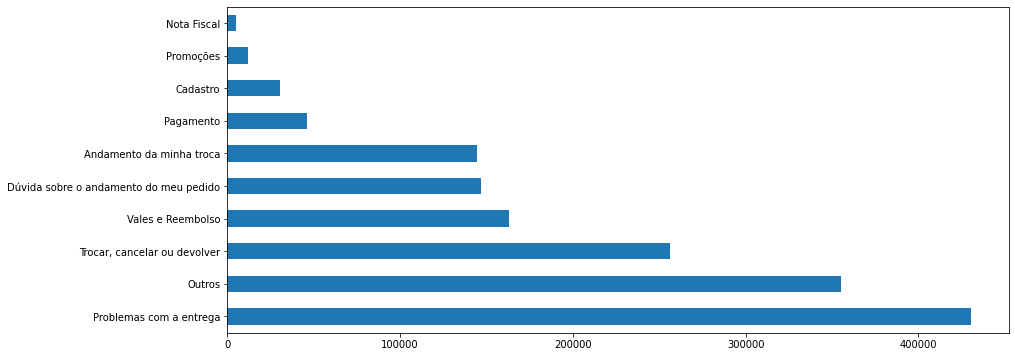

In [17]:
df['problem'].value_counts().plot(kind='barh', figsize=(14,6))

In [18]:
pv1 = df.pivot_table(values='sac_subject', index='sac_category', columns='problem', aggfunc='count')
pv1.div(pv1.sum())

problem,Andamento da minha troca,Cadastro,Dúvida sobre o andamento do meu pedido,Nota Fiscal,Outros,Pagamento,Problemas com a entrega,Promoções,"Trocar, cancelar ou devolver",Vales e Reembolso
sac_category,,,,,,,,,,
Ativo,0.000615,0.000723,0.000238,NaN,0.000917,0.000741,0.000476,0.000744,0.000807,0.000705
Elogio,0.000007,NaN,0.000014,NaN,0.000416,NaN,0.000056,0.000083,0.000008,0.000006
Exceção,0.000021,NaN,NaN,NaN,0.000068,0.000044,0.000016,0.000413,0.000008,0.000086
Improdutivo,0.028587,0.017939,0.021157,0.025382,0.059964,0.044556,0.033598,0.041391,0.053442,0.043402
Informação,0.662333,0.939085,0.592834,0.178465,0.661386,0.788316,0.463103,0.884831,0.552067,0.590293
Reclamação,0.220715,0.018761,0.339968,0.021019,0.146256,0.097984,0.482014,0.035443,0.069558,0.255767
Solicitação,0.087702,0.023426,0.045715,0.775134,0.129721,0.067117,0.020626,0.032716,0.324074,0.109589
Sugestão,0.000007,NaN,NaN,NaN,0.000779,0.000109,0.000060,0.000578,0.000016,0.000006
Vendas,0.000014,0.000066,0.000075,NaN,0.000492,0.001134,0.000051,0.003800,0.000020,0.000147


In [19]:
pv2 = df.pivot_table(values='sac_subject', index='sac_customer_voice', columns='problem', aggfunc='count', margins=True).sort_values(by='All', ascending=False).iloc[1:, :-1]
# pv2
pv2.div(pv2.sum(axis=1),axis=0)[:20]

problem,Andamento da minha troca,Cadastro,Dúvida sobre o andamento do meu pedido,Nota Fiscal,Outros,Pagamento,Problemas com a entrega,Promoções,"Trocar, cancelar ou devolver",Vales e Reembolso
sac_customer_voice,,,,,,,,,,
Ja realizei a compra e estou com dúvida sobre o andamento do pedido,0.030225,0.001173,0.230538,0.000937,0.198870,0.042072,0.428670,0.001705,0.037674,0.028135
Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução,0.196648,0.000368,0.002247,0.002565,0.227873,0.001154,0.023874,0.000519,0.513043,0.031709
Meu pedido ainda não chegou,0.007987,0.000103,0.214968,0.000124,0.097190,0.001473,0.630924,0.000113,0.022364,0.024753
"Estou arrependido, quero cancelar/trocar o produto",0.028996,0.000170,0.006759,0.000227,0.179328,0.024636,0.035528,0.002073,0.693599,0.028683
Meu problema não foi resolvido,0.068039,0.000242,0.078663,0.000877,0.126028,0.004791,0.544780,0.000287,0.046004,0.130290
Já devolvi meu produto e quero saber o andamento da troca / devolução,0.450300,0.000252,0.005583,0.000189,0.112060,0.001132,0.013620,0.000142,0.065710,0.351011
Como utilizar o cupom/vale,0.144955,0.000606,0.033034,0.000082,0.178955,0.006859,0.150619,0.030088,0.031381,0.423422
Quero alterar/incluir meu endereço de entrega,0.004364,0.003353,0.020507,0.000018,0.526928,0.001259,0.420138,0.000142,0.021873,0.001419
"Pedido consta como entregue, mas não recebi",0.005688,0.000021,0.031390,0.000043,0.095965,0.000342,0.852952,0.000086,0.006607,0.006907


In [20]:
df.pivot_table(values='sac_subject', index=['problem', 'sac_customer_voice'], aggfunc='count').reset_index()\
.sort_values('sac_subject', ascending = False).groupby('problem').head(3).sort_values(by=['problem', 'sac_subject'], ascending=[True, False])

,problem,sac_customer_voice,sac_subject
1,Andamento da minha troca,Ainda não devolvi meu produto e quero saber so...,39027
34,Andamento da minha troca,Já devolvi meu produto e quero saber o andamen...,28631
35,Andamento da minha troca,Já devolvi meu produto mas não fui atendido,13899
116,Cadastro,Como recupero meu login e senha de acesso,13428
140,Cadastro,Não consigo alterar meu cadastro,12982
115,Cadastro,Como me cadastrar/como comprar?,1055
219,Dúvida sobre o andamento do meu pedido,Ja realizei a compra e estou com dúvida sobre ...,77465
228,Dúvida sobre o andamento do meu pedido,Meu pedido ainda não chegou,41746
230,Dúvida sobre o andamento do meu pedido,Meu problema não foi resolvido,5205
337,Nota Fiscal,Quero receber minha nota fiscal,3351


### Detail

In [21]:
print('{:.1%} dos emails criados tem o Detalhe definido'.format(df.count()['detail']/df.shape[0]))

32.2% dos emails criados tem o Detalhe definido


### Created Date

<AxesSubplot:xlabel='created_date'>

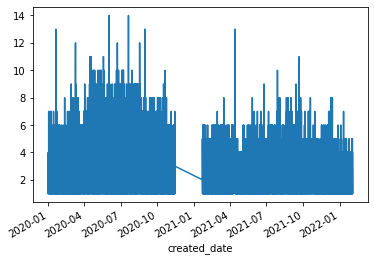

In [22]:
df.groupby(['created_date']).count()['message'].plot()

## Model

### Imports

In [23]:
# !pip install unidecode
# # !pip install imblearn
# # !pip install scikit-learn
# !pip install catboost
# # !pip install spacy
# # nltk.download('rslp')

# !pip install spacy -U
# !python -m spacy download pt_core_news_md

In [26]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from unidecode import unidecode
import pickle
import spacy

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool

2022-04-06 12:51:37.547299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 12:51:37.547411: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Definindo as Classes

In [27]:
# vozes que queremos responder
cv_list = [
  'Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução',
  'Estou arrependido, quero cancelar/trocar o produto',
  'Como utilizar o cupom/vale',
  'Qual o prazo para devolução do valor que paguei?',
  # 'Como me cadastrar/como comprar?',
  'Como recupero meu login e senha de acesso'
]

In [28]:
df['cv'] = df.apply(lambda x: x['sac_customer_voice'] if x['sac_customer_voice'] in (cv_list) else 'Outro', axis=1)

In [29]:
df['cv'].value_counts(normalize=True)

Outro                                                                              0.752807
Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução    0.124997
Estou arrependido, quero cancelar/trocar o produto                                 0.044256
Como utilizar o cupom/vale                                                         0.038464
Qual o prazo para devolução do valor que paguei?                                   0.027655
Como recupero meu login e senha de acesso                                          0.011820
Name: cv, dtype: float64

In [30]:
# problemas que estao bem relacionados as vozes que queremos classificar 
filter_problems = [
  'Andamento da minha troca',
  # 'Outros',
  'Cadastro',
  'Promoções',
  'Trocar, cancelar ou devolver',
  'Vales e Reembolso'
]

In [31]:
df[df['problem'].isin(filter_problems)].cv.value_counts(normalize=True)

Outro                                                                              0.527075
Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução    0.242734
Estou arrependido, quero cancelar/trocar o produto                                 0.087438
Como utilizar o cupom/vale                                                         0.063459
Qual o prazo para devolução do valor que paguei?                                   0.056307
Como recupero meu login e senha de acesso                                          0.022987
Name: cv, dtype: float64

In [32]:
# Porcentagem de mensagem restantes em cada classe pós filtro
df[df['problem'].isin(filter_problems)].cv.value_counts(normalize=False).div(df['cv'].value_counts(normalize=False))

Outro                                                                              0.265327
Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução    0.735905
Estou arrependido, quero cancelar/trocar o produto                                 0.748727
Como utilizar o cupom/vale                                                         0.625211
Qual o prazo para devolução do valor que paguei?                                   0.771574
Como recupero meu login e senha de acesso                                          0.736978
Name: cv, dtype: float64

In [33]:
df = df[df['problem'].isin(filter_problems)]

In [34]:
# Encode da coluna de target

map_cv= {
    'Ainda não devolvi meu produto e quero saber sobre processo de troca / devolução': 0,
    'Estou arrependido, quero cancelar/trocar o produto': 1,
    'Como utilizar o cupom/vale': 2,
    'Qual o prazo para devolução do valor que paguei?': 3,
    'Como recupero meu login e senha de acesso': 4,
    'Outro': 5
}

inv_map = {v: k for k, v in map_cv.items()}

df['cv_encoded'] = df['cv'].map(map_cv)

### Manipulação do Texto

In [35]:
df_backup = df.copy()

#### Lower Case

In [36]:
df = df_backup.copy()
df['original_message'] = df.message
# Lower case
df.message = df.message.apply(str.lower)

#### Stop Words

In [37]:
def stopword_remover(text):
  remove_from_stopword_list = ['não', 'mais', 'foi', 'será', 'quando', 'tive', 'mas', 'até'] # são stopwords, mas contribuem para o sentido do texto
  add_to_stopword_list = ['pois']
  stop_words = nltk.corpus.stopwords.words('portuguese')
  stop_words.extend(add_to_stopword_list)
  
  for i in remove_from_stopword_list:
      stop_words.remove(i)

  words = [w for w in text.split() if not w in stop_words]
  text = ' '.join(words)

  return text

In [38]:
df.message = df.message.apply(stopword_remover)

#### Duplicated spaces and special characters

In [39]:
df.message =  df.message.str.replace(r'\n', ' ', regex=True)
df.message =  df.message.str.replace(r'\t', ' ', regex=True)
df.message =  df.message.str.replace(r' +', ' ', regex=True)
df.message =  df.message.str.replace('r$', '', regex=False)
df.message =  df.message.str.replace(r'[^a-zÀ-ÿ ]+', '', regex=True) # only allow letters and whitespaces

#### Termos inúteis

In [40]:
def useless_terms_remover(text):
  '''
  Usar após stopword_remover
  '''
  useless_terms = ['bom dia', 'boa tarde', 'boa noite', 'tudo bem', 'olá', 'td bem']

  for term in useless_terms:
    text = re.sub(term, '', text)

  return text

In [41]:
df.message = df.message.apply(useless_terms_remover)

#### Substituições extras

Para evitar clusters desnecessários

In [42]:
dictionary = {
  ' n ': ' não ',
  ' q ': ' que ', 
  'ngm': 'ninguém',
  'mto': 'muito',
  'vcs': 'vocês',
  'certinho': 'certo',
  ' pro ': ' para o ',
  ' mail ': ' email ',
  'emails': 'email',
  'markt': 'market',
  'nesse site': 'dafiti',
  'nessa loja': 'dafiti',
  'informar que': 'dizer que',
  'https www reclameaqui br': 'reclame aqui',
  'vcs': 'voces',
  ' pra ': ' para ',
  'mercadoria': 'pedido',
  'mais deu': 'mas deu',
  'saber do': 'saber sobre',
  'empresa ': 'dafiti ',
  ' ver comentarios': ' ler comentarios',
  'produto': 'pedido',
  ' compra ': ' pedido ',
  'fazer compra': 'fazer pedido',
  'mudar': 'trocar',
  'receber': 'chegar',
  'entregar': 'chegar',          
  'até hoje': 'até agora',
  'mandar': 'enviar',
  'obg': 'obrigado',
  'obrigada': 'obrigado'
}

In [43]:
def subs(text):
  for key in dictionary.keys():
    text = text.replace(key, dictionary[key])
  return text

In [44]:
df.message = df.message.apply(subs)

#### Lematizacao

In [45]:
# df = df.reset_index(drop=True) # obrigatório para os índices se manterem corretos na criação da Series ao final

# nlp = spacy.load('pt_core_news_md')
# nlp.max_length = 5000000

# docs = df.message.to_list()

# lemmatized_docs = []
# print('Starting Pipe')
# for doc in nlp.pipe(docs, batch_size=8, n_process=8, disable=["parser", "ner"]):
#   sentece = []
#   for word in doc:
#     if ((word.pos_ == 'VERB') or (word.pos_ == 'ADJ')):
#       sentece.append(word.lemma_) # lemma
#     else:
#       sentece.append(word.orth_) # original
#   sent = ' '.join(sentece)    
#   lemmatized_docs.append(sent)

# df['message'] = pd.Series(lemmatized_docs) # back to series

In [46]:
# # Stemming
# print('Stemming')
# stemmer = nltk.stem.RSLPStemmer() 
# stemmed_docs = []
# for sentence in lemmatized_docs:
#   new_sentence = []
#   for word in sentence.split():
#     new_sentence.append(stemmer.stem(word))
#   stemmed_docs.append(' '.join(new_sentence))

# df['message_lemma'] = pd.Series(stemmed_docs) # back to series

#### Unidecode

In [47]:
df.message = df.message.apply(unidecode)

### Save/Load Dataframe

In [ ]:
pickle.dump(df, open(f'{path}/data/nltk_data.pkl', "wb"))

In [ ]:
#nltk_data - sem lemma
#nltk_data_2 - com lemma
# df = pickle.load(open(f'{path}/data/nltk_data_2.pkl', "rb"))

### Modelagem

In [ ]:
# df = pd.read_parquet('data/poc_sac_nltk2.parquet')

In [48]:
df2 = df.copy()
# df2 = df2[df2['problem'].isin(['Trocar, cancelar ou devolver', 'Vales e Reembolso'])]
# df2 = df2[df2.created_date >= '2021-01-01']
df2 = df2.sample(frac=0.3).reset_index()
print(df.shape[0], df2.shape[0])

X = df2['message']
y = df2[['cv_encoded', 'sac_customer_voice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42 , stratify=y.cv_encoded)

print('train size :', len(X_train) )
print('test size :', len(X_test) )

606900 182070
train size : 127448
test size : 54622


In [49]:
df2.cv_encoded.value_counts()

5    95997
0    44126
1    15940
2    11571
3    10294
4     4142
Name: cv_encoded, dtype: int64

#### TF-IDF

In [50]:
tfidf=TfidfVectorizer(
  max_features=1000,
  max_df=0.95,
  min_df=10,
  ngram_range=(1, 4)
)

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

#### Treino

In [51]:
def evaluate(model, X_train, y_train, X_test, y_test):
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print( "F1 Score:" , f1_score(y_test, y_pred, average='macro' ) )
  return model

##### Catboost

In [52]:
# CatBoost
train_dataset = Pool(X_train_vector, y_train.cv_encoded)
test_dataset = Pool(X_test_vector, y_test.cv_encoded)

cb = CatBoostClassifier(
    # task_type='GPU',
    iterations=500,
    eval_metric='TotalF1',
    loss_function='MultiClass',
    early_stopping_rounds=50
    #Learner parameters
    # learning_rate=0.1,
    # depth=10,
    # l2_leaf_reg=1

)

# #Declare parameters to tune and values to try
# grid = {
#     'learning_rate': [0.03, 0.1],
#     'depth': [4, 6, 10],
#     'l2_leaf_reg': [1, 3, 5,]
# }

# #Find optimum parameters
# grid_search_result = cb.grid_search(grid, train_dataset, plot=True)

#Fit model with early stopping if improvement hasn't been made within 50 iterations
cb.fit(
    train_dataset, 
    eval_set=test_dataset
)

Learning rate set to 0.155034
0:	learn: 0.4877979	test: 0.4849077	best: 0.4849077 (0)	total: 3m 1s	remaining: 1d 1h 10m
1:	learn: 0.4865128	test: 0.4824884	best: 0.4849077 (0)	total: 3m 3s	remaining: 12h 39m 46s
2:	learn: 0.4782011	test: 0.4751763	best: 0.4849077 (0)	total: 3m 4s	remaining: 8h 29m 32s
3:	learn: 0.4849706	test: 0.4810606	best: 0.4849077 (0)	total: 3m 6s	remaining: 6h 24m 45s
4:	learn: 0.4582799	test: 0.4542576	best: 0.4849077 (0)	total: 3m 8s	remaining: 5h 10m 30s
5:	learn: 0.4863985	test: 0.4814511	best: 0.4849077 (0)	total: 3m 10s	remaining: 4h 20m 51s
6:	learn: 0.4651365	test: 0.4613789	best: 0.4849077 (0)	total: 3m 11s	remaining: 3h 44m 54s
7:	learn: 0.4657391	test: 0.4608827	best: 0.4849077 (0)	total: 3m 13s	remaining: 3h 17m 51s
8:	learn: 0.4728858	test: 0.4671545	best: 0.4849077 (0)	total: 3m 14s	remaining: 2h 56m 55s
9:	learn: 0.4972148	test: 0.4902626	best: 0.4902626 (9)	total: 3m 15s	remaining: 2h 40m 3s
10:	learn: 0.4974285	test: 0.4914419	best: 0.4914419 (10

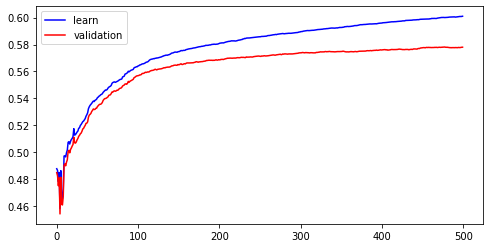

In [53]:
results = cb.get_evals_result()

fig, axes = plt.subplots(figsize=(8,4))
plt.plot(results['learn']['TotalF1'], c='b', label='learn')
plt.plot(results['validation']['TotalF1'], c='r', label='validation')
axes.legend()

In [54]:
y_pred_cb = cb.predict(X_test_vector)
print(classification_report(y_test.cv_encoded, y_pred_cb))
conf_matrix = confusion_matrix(y_test.cv_encoded, y_pred_cb)
print(conf_matrix)
print( "\nF1 Score:" , f1_score(y_test.cv_encoded, y_pred_cb, average='macro' ) )

conf_matrix = confusion_matrix(y_test.cv_encoded, y_pred_cb)

print('{0:.2%} dos emails foram respondidos \n --------------------'.format(conf_matrix[:-1, :-1].sum() / conf_matrix[:-1, :].sum()))
print('{0:.2%} dos emails enviados como Classe 0 foram classificados corretamente'.format(conf_matrix[0, 0].sum() / conf_matrix[:, 0].sum()))
print('{0:.2%} dos emails enviados como Classe 1 foram classificados corretamente'.format(conf_matrix[1, 1].sum() / conf_matrix[:, 1].sum()))
print('{0:.2%} dos emails enviados como Classe 2 foram classificados corretamente'.format(conf_matrix[2, 2].sum() / conf_matrix[:, 2].sum()))
print('{0:.2%} dos emails enviados como Classe 3 foram classificados corretamente'.format(conf_matrix[3, 3].sum() / conf_matrix[:, 3].sum()))
print('{0:.2%} dos emails enviados como Classe 4 foram classificados corretamente'.format(conf_matrix[4, 4].sum() / conf_matrix[:, 4].sum()))
print('{0:.2%} dos emails enviados como Classe 5 foram classificados corretamente'.format(conf_matrix[5, 5].sum() / conf_matrix[:, 5].sum()))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61     13238
           1       0.54      0.40      0.46      4782
           2       0.60      0.08      0.14      3471
           3       0.42      0.08      0.13      3088
           4       0.48      0.39      0.43      1243
           5       0.63      0.77      0.69     28800

    accuracy                           0.61     54622
   macro avg       0.54      0.39      0.41     54622
weighted avg       0.60      0.61      0.58     54622

[[ 8289   267     0     6     0  4676]
 [  980  1931     0     2     0  1869]
 [   54    14   266     8     1  3128]
 [   41    57     6   236     0  2748]
 [   14     0     0     0   480   749]
 [ 4427  1301   173   306   521 22072]]

F1 Score: 0.40960872378627505
49.00% dos emails foram respondidos 
 --------------------
60.04% dos emails enviados como Classe 0 foram classificados corretamente
54.09% dos emails enviados como Classe 1 foram classificad

##### RandomForest

In [55]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vector, y_train.cv_encoded)

RandomForestClassifier(random_state=42)

In [56]:
y_pred_rf = rf.predict(X_test_vector)
print(classification_report(y_test.cv_encoded, y_pred_rf))
conf_matrix = confusion_matrix(y_test.cv_encoded, y_pred_rf)
print(conf_matrix)
print( "\nF1 Score:" , f1_score(y_test.cv_encoded, y_pred_rf, average='macro' ) )

print('{0:.2%} dos emails foram respondidos \n --------------------'.format(conf_matrix[:-1, :-1].sum() / conf_matrix[:-1, :].sum()))
print('{0:.2%} dos emails enviados como Classe 0 foram classificados corretamente'.format(conf_matrix[0, 0].sum() / conf_matrix[:, 0].sum()))
print('{0:.2%} dos emails enviados como Classe 1 foram classificados corretamente'.format(conf_matrix[1, 1].sum() / conf_matrix[:, 1].sum()))
print('{0:.2%} dos emails enviados como Classe 2 foram classificados corretamente'.format(conf_matrix[2, 2].sum() / conf_matrix[:, 2].sum()))
print('{0:.2%} dos emails enviados como Classe 3 foram classificados corretamente'.format(conf_matrix[3, 3].sum() / conf_matrix[:, 3].sum()))
print('{0:.2%} dos emails enviados como Classe 4 foram classificados corretamente'.format(conf_matrix[4, 4].sum() / conf_matrix[:, 4].sum()))
print('{0:.2%} dos emails enviados como Classe 5 foram classificados corretamente'.format(conf_matrix[5, 5].sum() / conf_matrix[:, 5].sum()))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60     13238
           1       0.56      0.36      0.44      4782
           2       0.54      0.08      0.13      3471
           3       0.48      0.04      0.07      3088
           4       0.49      0.25      0.33      1243
           5       0.62      0.79      0.69     28800

    accuracy                           0.61     54622
   macro avg       0.55      0.35      0.38     54622
weighted avg       0.59      0.61      0.57     54622

[[ 8093   207     6     7     3  4922]
 [ 1014  1721     0     2     1  2044]
 [   71    14   261    13     0  3112]
 [   44    45     3   125     0  2871]
 [   19     0     0     1   306   917]
 [ 4432  1067   210   113   313 22665]]

F1 Score: 0.3782186657805677
46.30% dos emails foram respondidos 
 --------------------
59.19% dos emails enviados como Classe 0 foram classificados corretamente
56.35% dos emails enviados como Classe 1 foram classificado

#### Validando Resultados

In [57]:
predict_cb=[i[0] for i in y_pred_cb]
# predict_rf=[i[0] for i in y_pred_rf]
df_result = pd.DataFrame({'message':X_test.values, 'predict_cb':predict_cb, 'predict_rf':y_pred_rf, 'true':y_test.cv_encoded.values, 'original':y_test.sac_customer_voice.values})
df_result.predict_cb = df_result.predict_cb.map(inv_map)
df_result.predict_rf = df_result.predict_rf.map(inv_map)
df_result.true = df_result.true.map(inv_map)

df_result
df_result.to_csv(f'{path}/data/validar2.csv')

Uma analise no dataset acima mostrou que os resultados gerados pelo RandomForest estão um pouco melhores que o Catboost. Usaremos daqui pra frente apenas o primeiro modelo

In [ ]:
wrong_pred_df = df_result[(df_result.true == 'Outro') & (df_result.predict_rf != 'Outro')]
wrong_class_list = wrong_pred_df.groupby('original')['message'].count().sort_values(ascending=False)[:10]
wrong_class_list

In [ ]:
aux_df = []
for cv in wrong_class_list.index.to_list():
  words = ' '.join(wrong_pred_df[wrong_pred_df.original == cv].message).split()
  ngram = [_ for _ in zip(words, words[1:], words[2:])]

  c = Counter(ngram).most_common(10)

  words = []
  for i in c:
    words.append(f'{i[0][0]} {i[0][1]} {i[0][2]}')

  aux_df.append(pd.DataFrame(words, columns=[cv]))

pd.concat(aux_df, axis=1)

#### Dicionario

Emails com essas palavras não fazem parte da lista de classes que queremos predizer

In [ ]:
remove_grams = [
  'nao recebi codigo',
  'nao recebi email',
  'recebi codigo postagem',
  'codigo autorizacao postagem'
]

#### Aplicando Remocao usando o Dicionario

In [ ]:
df_result.loc[df_result.message.str.contains('|'.join(remove_grams)), 'predict_cb'] = 'Outro'

In [ ]:
df_result

#### Threshold

In [ ]:
# predicoes menores que o valor definido serao classificadas como "outro"
threshold_proba = 0.4
y_pred_proba = cb.predict_proba(X_test_vector)
y_pred_threshold = [map_cv['Outro'] if sum(p<threshold_proba)==4 else np.argmax(p) for p in y_pred_proba]
y_pred_threshold = pd.DataFrame(y_pred_threshold, columns=['customer_voice'])['customer_voice']

print(classification_report(y_test.cv_encoded, y_pred_threshold))
print(confusion_matrix(y_test.cv_encoded, y_pred_threshold))

conf_matrix = confusion_matrix(y_test.cv_encoded, y_pred_threshold)
print('{0:.2%} dos emails foram respondidos \n --------------------'.format(conf_matrix[:-1, :-1].sum() / conf_matrix[:-1, :].sum()))
print('{0:.2%} dos emails enviados como Classe 0 foram classificados corretamente'.format(conf_matrix[0, 0].sum() / conf_matrix[:, 0].sum()))
print('{0:.2%} dos emails enviados como Classe 1 foram classificados corretamente'.format(conf_matrix[1, 1].sum() / conf_matrix[:, 1].sum()))
print('{0:.2%} dos emails enviados como Classe 2 foram classificados corretamente'.format(conf_matrix[2, 2].sum() / conf_matrix[:, 2].sum()))
print('{0:.2%} dos emails enviados como Classe 3 foram classificados corretamente'.format(conf_matrix[3, 3].sum() / conf_matrix[:, 3].sum()))
print('{0:.2%} dos emails enviados como Classe 4 foram classificados corretamente'.format(conf_matrix[4, 4].sum() / conf_matrix[:, 4].sum()))
print('{0:.2%} dos emails enviados como Classe 5 foram classificados corretamente'.format(conf_matrix[5, 5].sum() / conf_matrix[:, 5].sum()))